<a href="https://colab.research.google.com/github/Happday-bot/Quantum-Computing-Projects/blob/main/Addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 90.4 MB/s eta 0:00:00


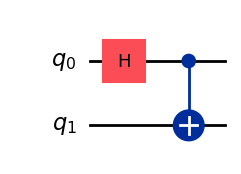

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw(output="mpl")

# **Half Adder circuit**

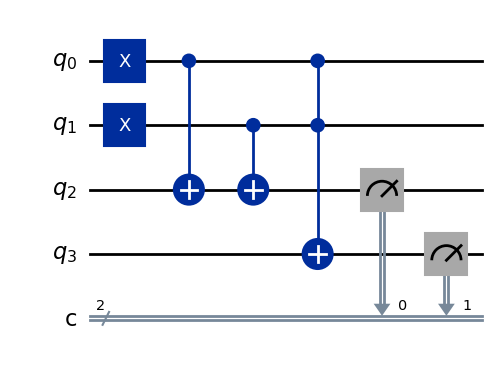

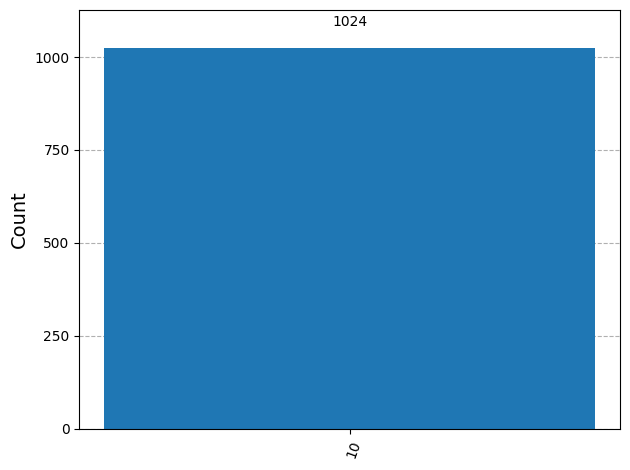

In [ ]:
qc = QuantumCircuit(4, 2)
# Qubit mapping:
# q0 = A
# q1 = B
# q2 = Sum
# q3 = Carry

qc.x(0)
qc.x(1)

# Sum = A XOR B
qc.cx(0, 2)   # Copy A to Sum
qc.cx(1, 2)   # XOR B with Sum

# Carry = A AND B
qc.ccx(0, 1, 3)  # Toffoli gate: Carry = A AND B


qc.measure(2, 0)
qc.measure(3, 1)

# Display circuit and results
display(qc.draw("mpl"))

sim = AerSimulator()
sim_result = sim.run(qc).result()
result = sim_result.get_counts()


statistics = result
display(plot_histogram(statistics))


# **Full Addder**

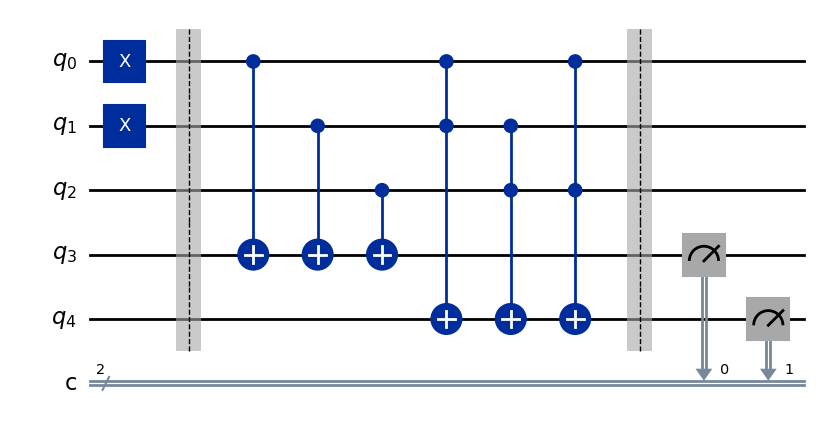

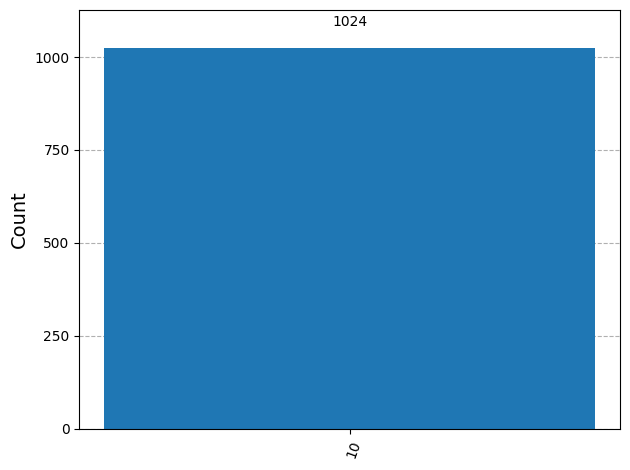

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(5, 2)
qc.x(0)
qc.x(1)


qc.barrier()
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

qc.ccx(0, 1, 4)
qc.ccx(1, 2, 4)
qc.ccx(0, 2, 4)

qc.barrier()
qc.measure(3, 0)
qc.measure(4, 1)




#results
display(qc.draw("mpl"))

sim = AerSimulator()
sim_result = sim.run(qc).result()
result = sim_result.get_counts()


statistics = result
display(plot_histogram(statistics))


# To add a four digit number

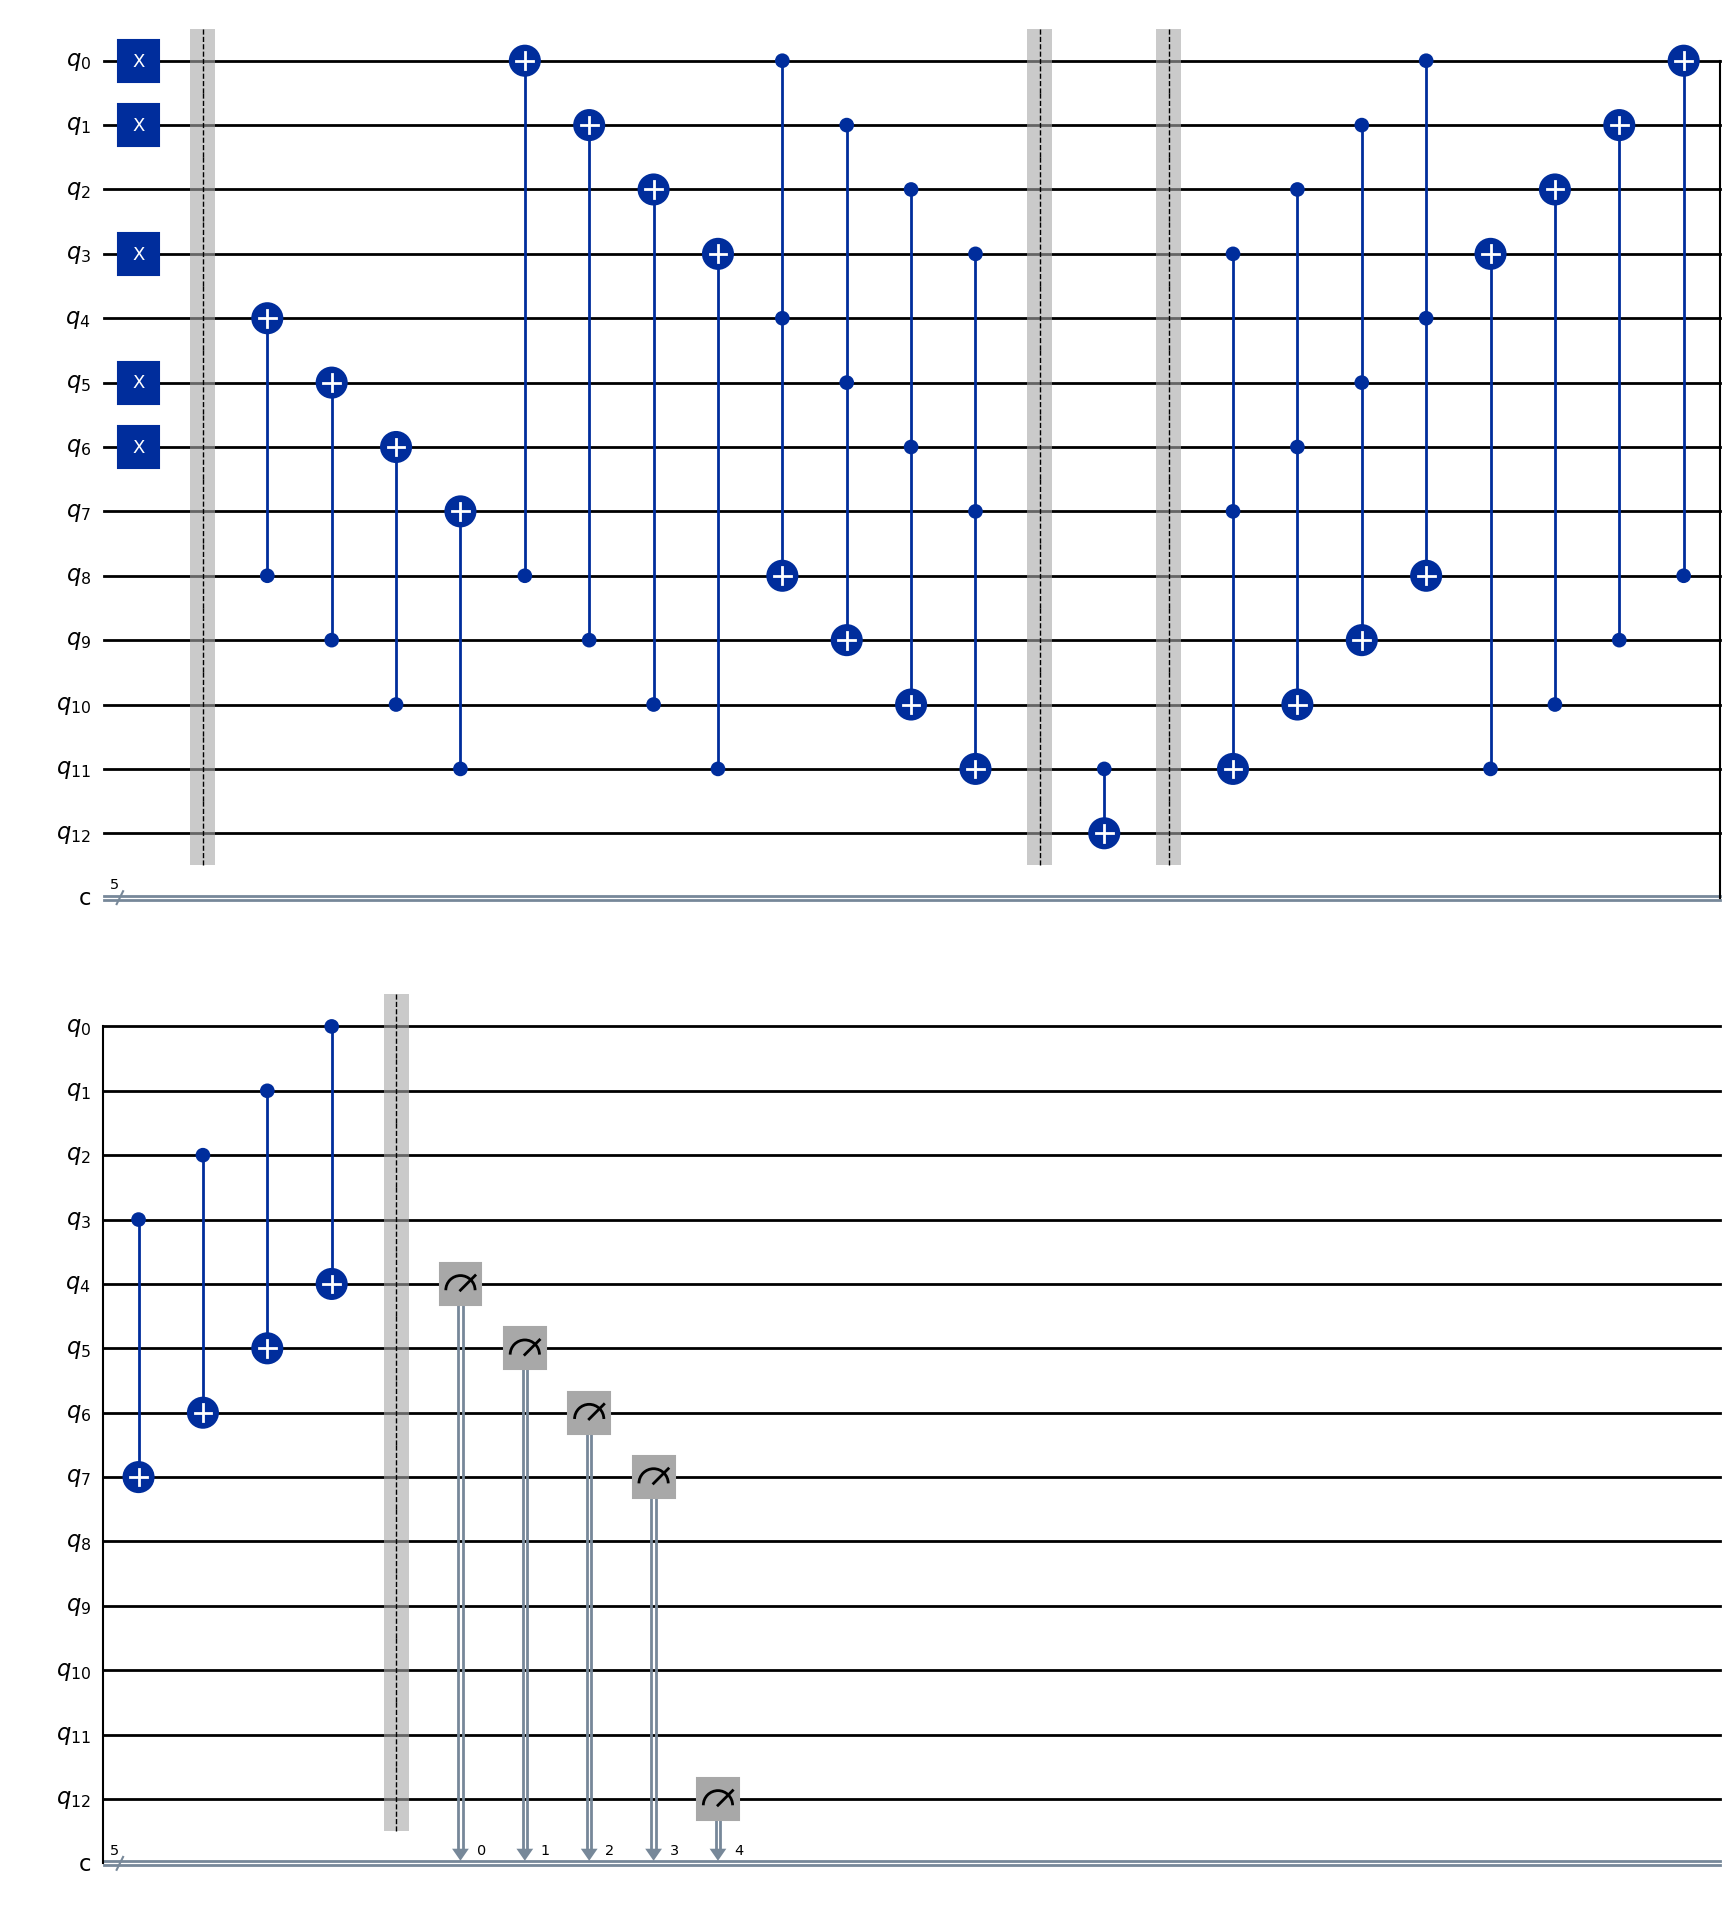

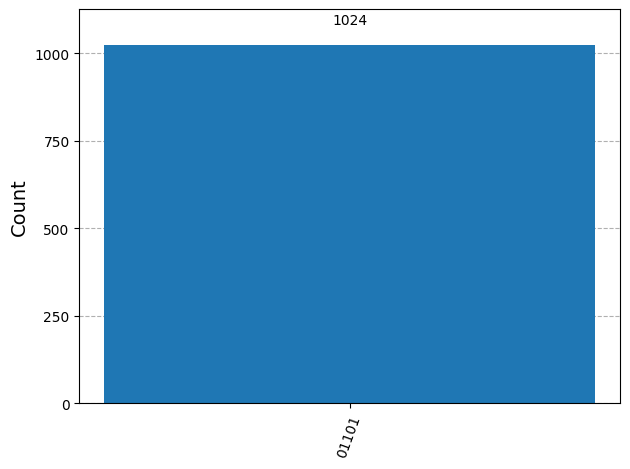

In [ ]:
from qiskit import QuantumCircuit

def majority(qc, a, b, c):
    qc.cx(c, b)
    qc.cx(c, a)
    qc.ccx(a, b, c)

def unmajority(qc, a, b, c):
    qc.ccx(a, b, c)
    qc.cx(c, a)
    qc.cx(a, b)

qc = QuantumCircuit(13, 5)

# first number  1011
qc.x(0)
qc.x(1)
qc.x(3)

#second number 0110
qc.x(5)
qc.x(6)

qc.barrier()
majority(qc, 0, 4, 8)
majority(qc, 1, 5, 8+1)
majority(qc, 2, 6, 8+2)
majority(qc, 3, 7, 8+3)

qc.barrier()
qc.cx(8+3, 8+4)

qc.barrier()
unmajority(qc, 3, 7, 8+3)
unmajority(qc, 2, 6, 8+2)
unmajority(qc, 1, 5, 8+1)
unmajority(qc, 0, 4, 8)


qc.barrier()
qc.measure(4, 0)
qc.measure(5, 1)
qc.measure(6, 2)
qc.measure(7, 3)
qc.measure(8+4, 4)

display(qc.draw("mpl"))

sim = AerSimulator()
sim_result = sim.run(qc).result()
result = sim_result.get_counts()


statistics = result
display(plot_histogram(statistics))


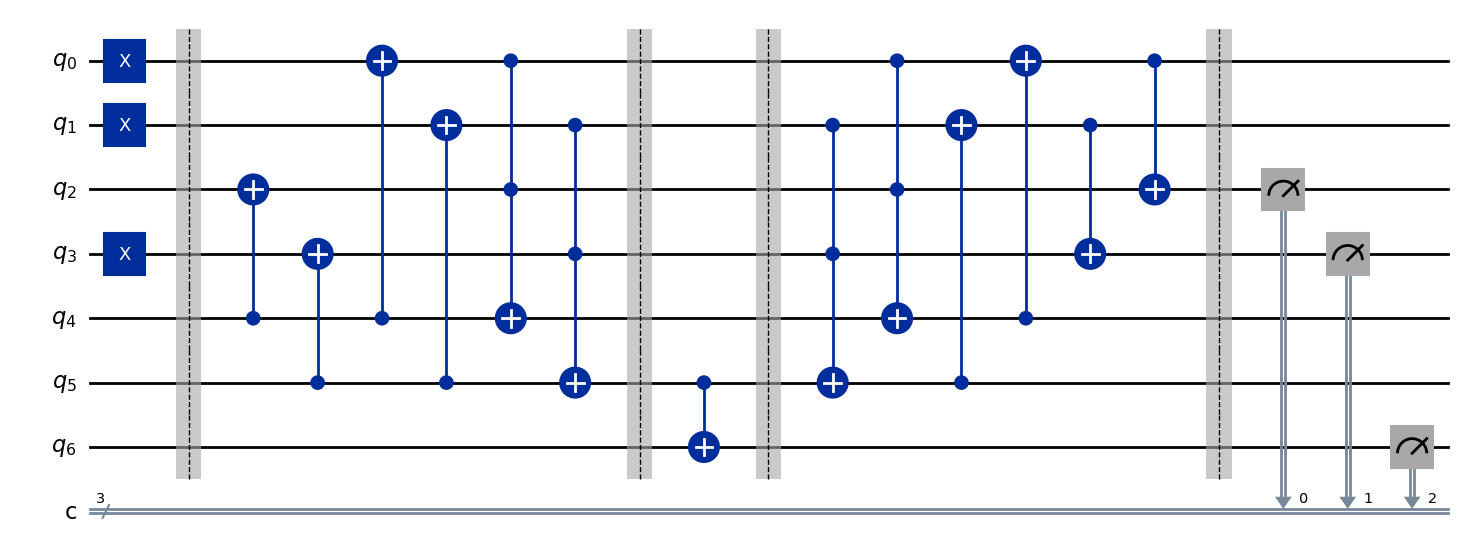

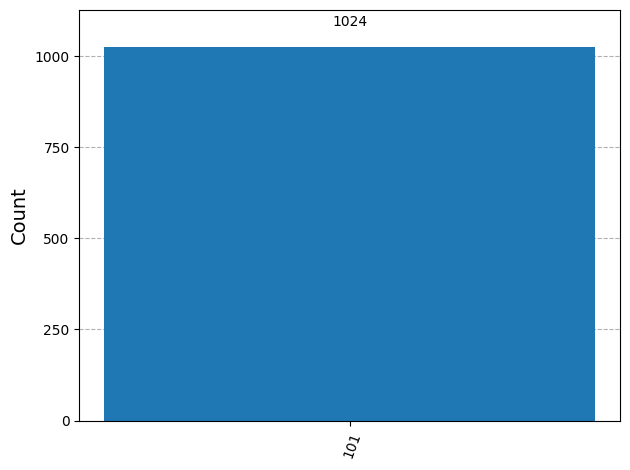

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

def majority(qc, a, b, c):
    qc.cx(c, b)
    qc.cx(c, a)
    qc.ccx(a, b, c)

def unmajority(qc, a, b, c):
    qc.ccx(a, b, c)
    qc.cx(c, a)
    qc.cx(a, b)

qc = QuantumCircuit(7, 3)
# input 1 is 11
qc.x(0)
qc.x(1)

# input 2 is 10
qc.x(3)
qc.barrier()

majority(qc, 0, 2, 4)
majority(qc, 1, 3, 5)
qc.barrier()
qc.cx(5, 6)
qc.barrier()

unmajority(qc, 1, 3, 5)
unmajority(qc, 0, 2, 4)
qc.barrier()

qc.measure(2, 0)
qc.measure(3, 1)
qc.measure(6, 2)

display(qc.draw("mpl"))

sim = AerSimulator()
sim_result = sim.run(qc).result()
result = sim_result.get_counts()


statistics = result
display(plot_histogram(statistics))
